In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston_df = pd.DataFrame(data= boston_dataset.data , columns=boston_dataset.feature_names)

In [14]:
boston_df['price'] = boston_dataset.target

In [15]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


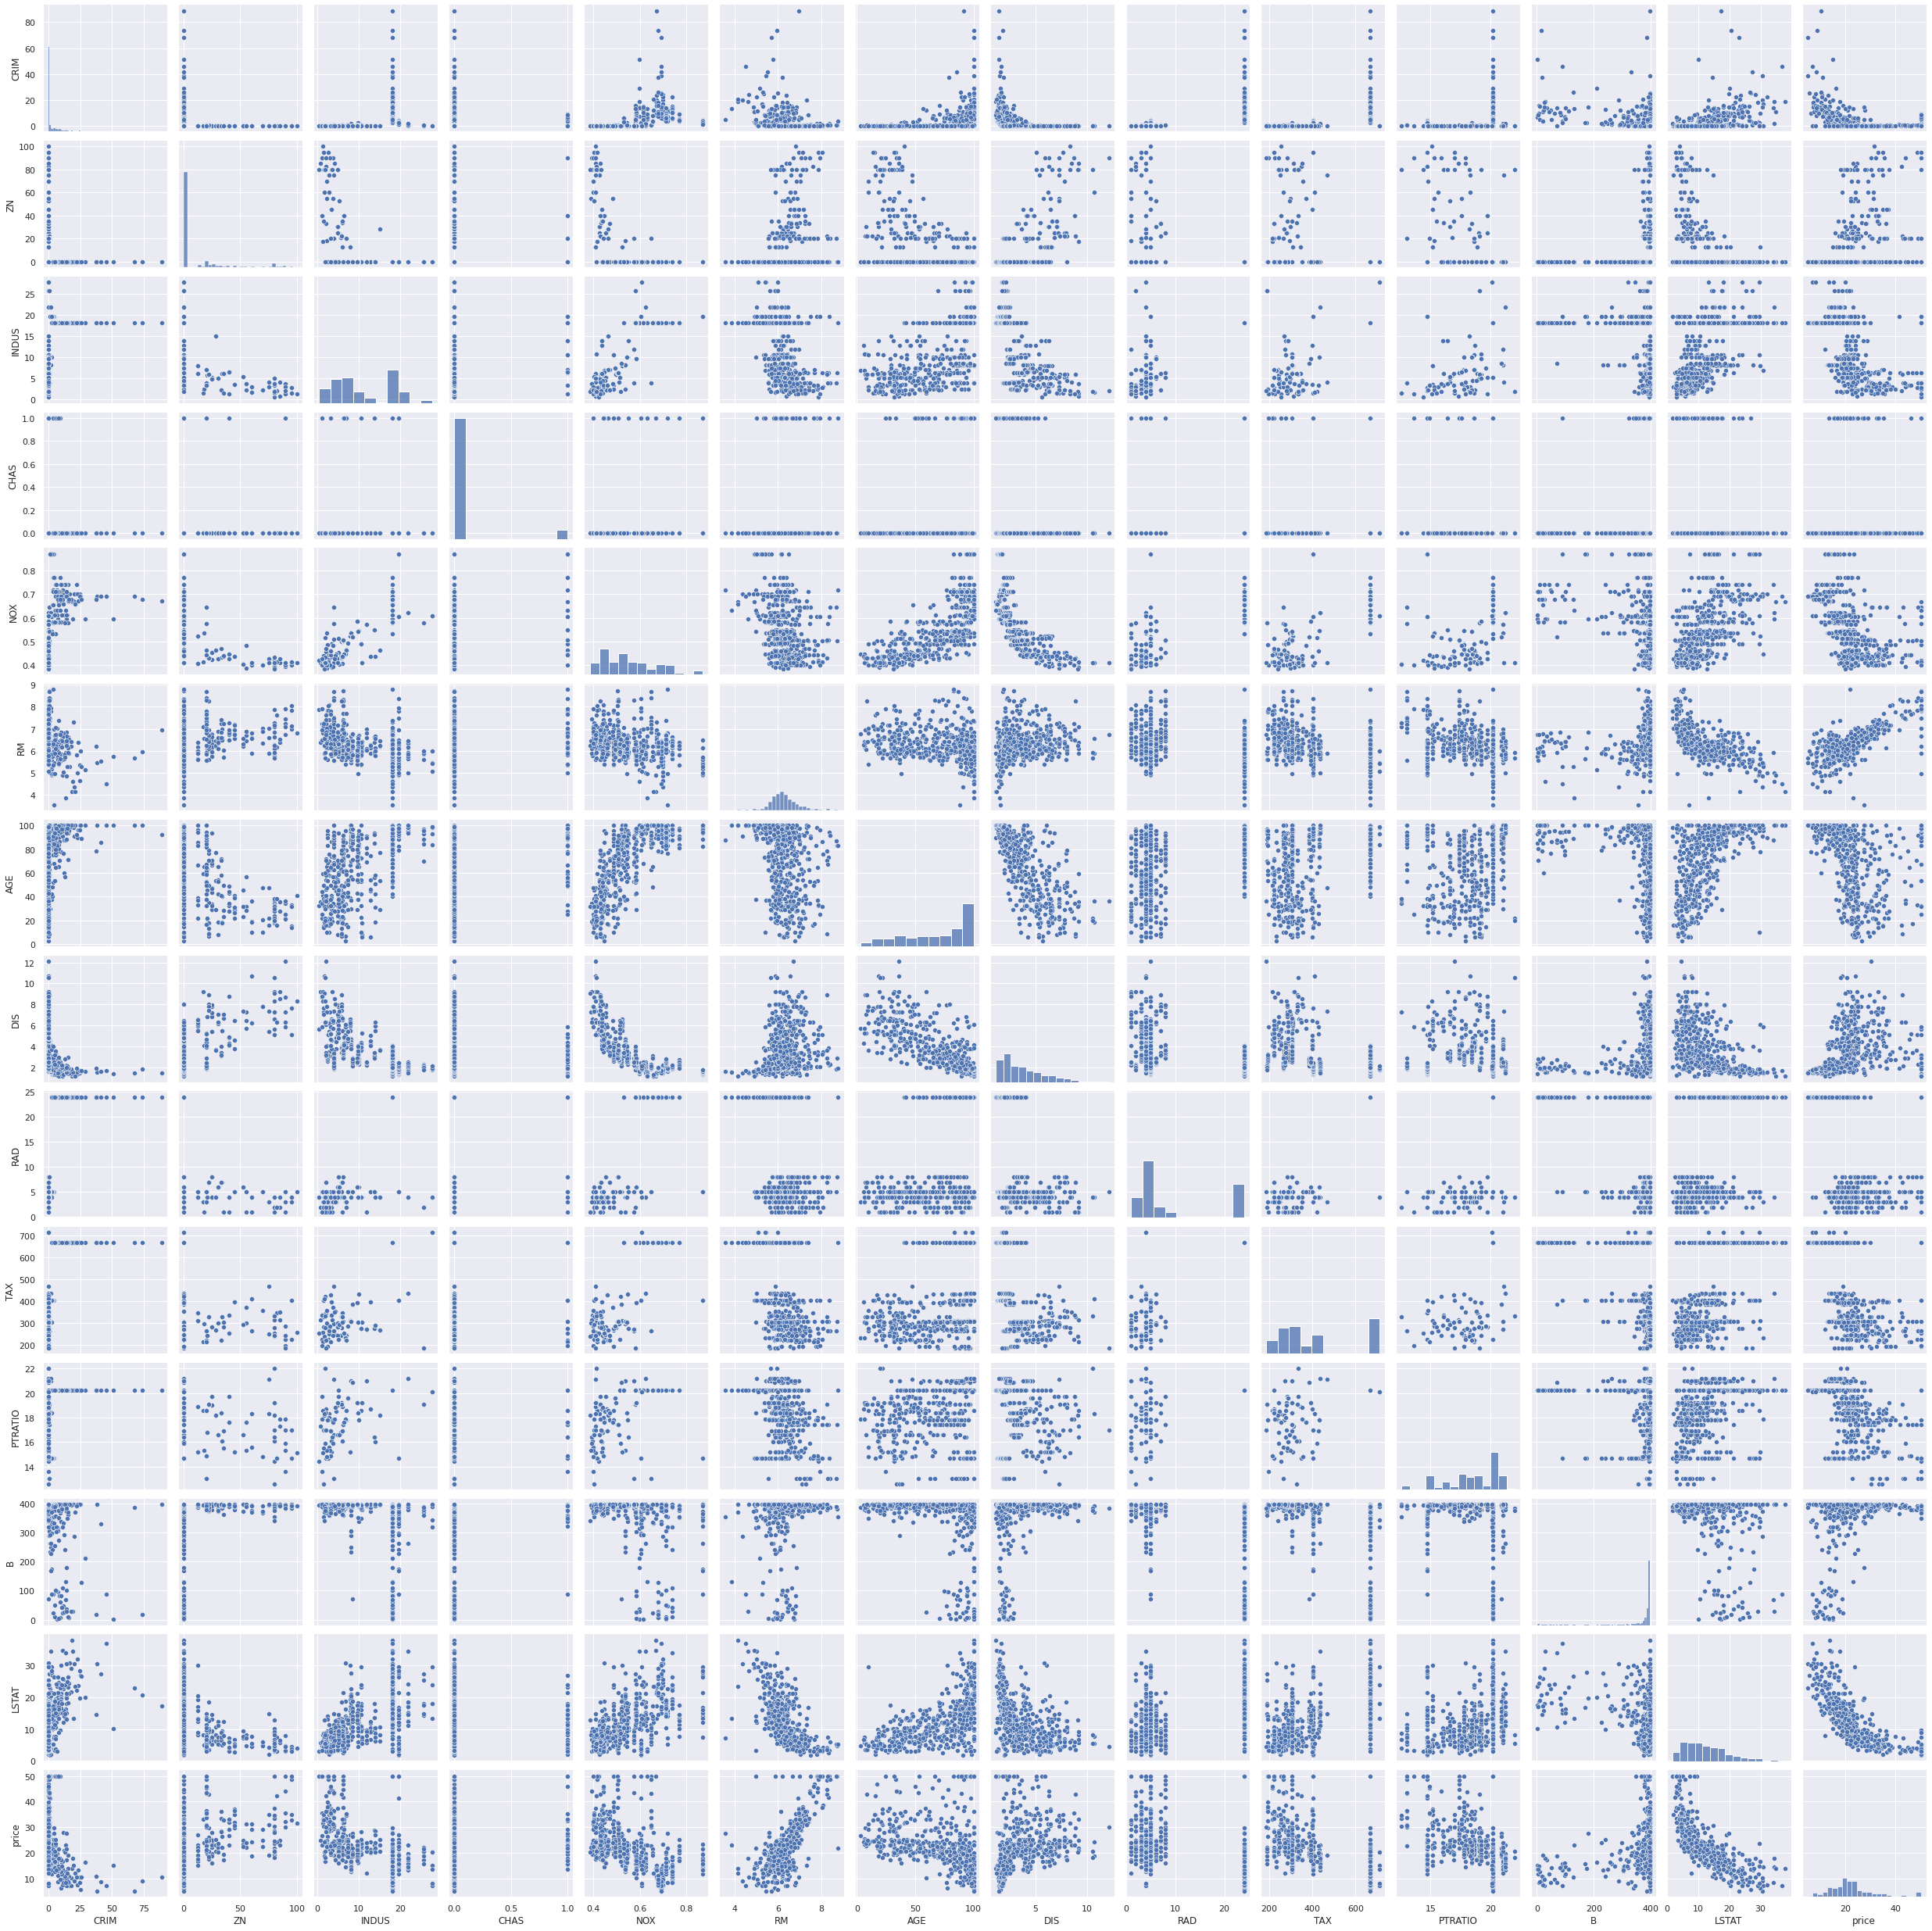

In [17]:
sns.pairplot(boston_df)

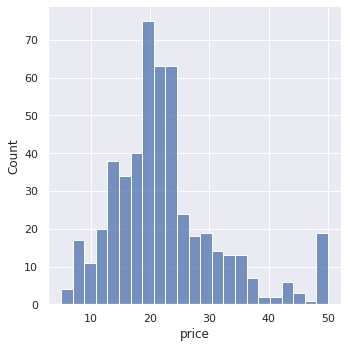

In [20]:
sns.displot(boston_df['price'])

In [38]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
RM         0
AGE        0
RAD        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

<AxesSubplot:>

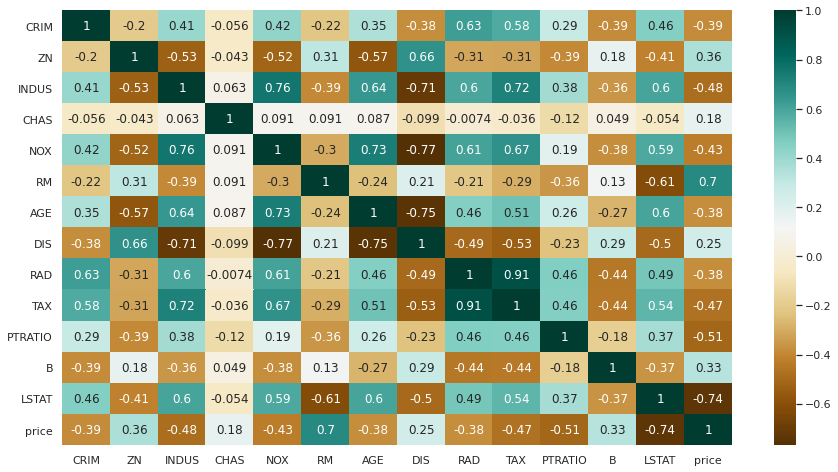

In [22]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(boston_df.corr(),cmap="BrBG",annot=True)

# Remove highly corr features

In [23]:
correlated_features = set()
correlation_matrix = boston_df.corr()
threshold = 0.75
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print(correlated_features)

{'DIS', 'NOX', 'TAX'}


In [24]:
boston_df = boston_df.drop(labels=['DIS','NOX','TAX'], axis=1)

In [26]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,RAD,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,6.575,65.2,1.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,6.421,78.9,2.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,7.185,61.1,2.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,6.998,45.8,3.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,7.147,54.2,3.0,18.7,396.90,5.33,36.2


In [35]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
X = boston_df.iloc[: , :-1]
y = boston_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:
search_hyper_params = {'svr__C': [0.01, 0.1, 1 , 8, 10 , 100, 1000], 
                       'svr__gamma': [2, 1, 0.1, 0.01, 0.001,0.0005, 0.0001],
                        'svr__degree':[1,3,8,10,2,13,5]}

In [93]:
for kernels in ('linear', 'rbf','sigmoid','precomputed'):
    svm_classifier = SVR(kernel=kernels)
    pipe_steps = [('scaler', preprocessing.StandardScaler()), ('svr', svm_classifier)]
    pipe = Pipeline(steps=pipe_steps)
    grid_search = GridSearchCV(pipe, search_hyper_params, cv=25, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    prediction = grid_search.predict(X_test)
    print("-------------",kernels,"---------------")
    print("best parameters: ",grid_search.best_params_)
    print(r2_score(y_test, prediction))

KeyboardInterrupt: 